
In computer Science, problems are divided into classes known as *Complexity Classes*; which are sets of problems with related complexity. 
- ***Polynomial (P)***: The class of problems *solved* in polynomial time, $O(n^k)$ for some constant $k$.
- ***Non-deterministic Polynomal (NP)***: The class of problems *verifiable* in polynomial time; and are *solvable* by non-deterministic machines (quantum computers) in polynomial time.
- ***Non-deterministic Polynomal-Hard (NP-Hard)***: A computational problem $H$ is called *NP-hard* if, for every problem $L$ which can be solved in non-deterministic polynomial-time, there is a ***polynomial-time reduction***(a method for solving one problem using another) from $L$ to $H$. That is, assuming a solution for $H$ takes 1 unit time, $H$ 's solution can be used to solve $L$ in polynomial time.
    - As a consequence, finding a polynomial time algorithm to solve a single *NP-hard* problem would give polynomial time algorithms for all the problems in the complexity class *NP*.
- ***Non-deterministic Polynomal-Complete (NP-Complete)***: This class of problems which are both *NP* and *NP-hard* (Hardest problems in *NP*).

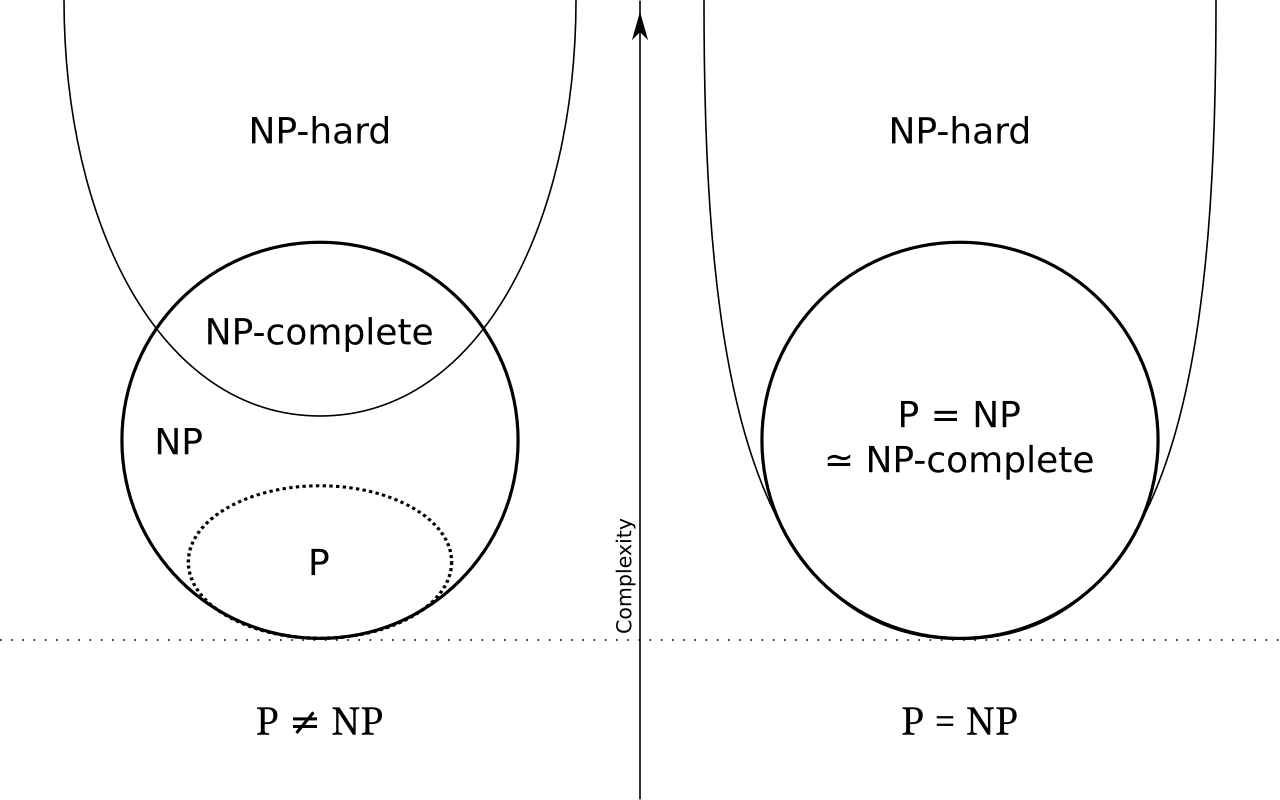
left-hand side are valid under the assumption that *P $\neq$ NP*, with the right-hand side having the assumption that *P $=$ NP*.
- **Example**) Finding the shortst path in a graph can be solved in $O(V^2)$ (*Dijkstra's algorithm*, etc.), meaning that it is a *P* problem. However, Finding a Hamiltonian cycle (simple cycle that contains each vertex $V$) in a directed graph $G(V,E)$ is an *NP* problem as verifyinf that a cycle is hamiltonian is polynomial $O(V)$. Additionally, the Hamiltonian cycle problem is an *NP-complete* problem. Furthermore, the Halting problem; determining from a description of an arbitrary computer program and an input whether the program will finish running, is an *NP-hard* problem.

**Very similar problems can have very different complexities**. A good demostration of this is the *Interval Scheduling* problem; where $1,\ldots,n$ requests require a single shared resource (more general forms can have an arbitrary number of shared resources), with each request having a start and finish times, $s(i)$ and $f(i)$ where $s(i)<f(i)$(interval of time). Two requests are compatible if they do not overlap, $f(i)\leq s(j)$ or $f(j)\leq s(i)$. The problem asks to select a compatible request subset of maximum size (schedule with the most requests)

In [ ]:
# [O(n), O(n^2)] time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests)
    largestSubset = similar(requests, 0)
    headOfSubset = -1
    for (i, (startI, stopI)) in enumerate(requests)
        subset = similar(requests, 0)
        for (j, (startJ, stopJ)) in enumerate(requests[i+1:end]) 
            if startJ ≥ stopI
                push!(subset, (startJ, stopJ))
            end
        end
        if length(subset) > length(largestSubset)
            largestSubset = deepcopy(subset)
            headOfSubset = i
        end
    end
    verbose && println(largestSubset)
    return append!([requests[headOfSubset]], simple_interval_scheduling(largestSubset))
end 
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)

While the above solution solves the problem in polynomial time, there is a better method using a ***Greedy Algorithm***; a myopic procedure which does not look ahead of the current state of the problem, only looking to maximise it without regard to future processing (select element $i$ based on a simple rule $\rightarrow$ reject all elements that are incompatible with $i$ $\rightarrow$ reapeat untill all requests are processed).

Let $L=\{(s(i),f(i))\}_{i=1}^n$ where $f(i)>s(i)$ sorted by increasing $f(j)$, then, all intervals which are incompatible with $(s(1),f(1))$ are either; $s(i)\leq s(1) \cap f(i)\geq f(1)$ and $s(j)<f(1) \cap f(j)\geq f(1)$, and so are themselves incompatible with one another as $s(j)<f(i)$. Furthermore, it means that $f(1)\leq \min(f(i), f(j))$ which means that any *potential optimal* subset created using either $(s(i),f(i))$ or $(s(j),f(j))$ can also instead include $(s(1),f(1))$ with additional elements which can fit in the cap created by the use of the earliest finish time. Therefore, using this elements would potentially increase the *potential optimal subset* with elements which would have been incompatible with either $(s(i),f(i))$ or $(s(j),f(j))$ but compatible with the *potential optimal subset*. Repeating this method would generate the *optimal subset*.
-  **Proof** by *Induction*: Given the a list of intervals $L$, greedy algorithm with **earliest finish time** produces $k^*$ intervals, where $k^*$ is optimal. The base case of $k^*=1$ means that any interval is valid, and supposing the claim holds for $k^*$; then for $k^*+1$ the optimal schedule is given by $S^*[1,\ldots,k^*+1]=(s(j_1),f(j_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ and that for some generic $k$ the greedy algorithm gives a list of intervals $S[1,\ldots,k]=(s(i_1),f(i_1)),\ldots,(s(i_k),f(i_k))$. It is true that $f(_1)\leq f(j_1)$ as th egreedy algorithm picks the earliest finish first, and so the schedule $S^{**}[1,\ldots,k^*+1]=(s(i_1),f(i_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ as $(s(i_1),f(i_1))$ will not overlap with the interval $(s(j_2),f(j_2))$; thus this schedule is also optimal. Then, defining $L'$ as the set of itervals with $s(i)\geq f(i_1)$ and since $S^{**}$ is optimal for $L$, then $S^{**}[2,\ldots,k^*+1]$ is optimal for $L'$ of size $k^*$. Therefore, by the assumption it would mean that the greedy algorithm will produce an optimal schedule $S[2,\ldots,k^*+1]$ and therefore the new schedule $(s(i_1),f(i_1)), S[2,\ldots,k^*+1]$ generated by the greedy algorithm is optimal.

This reduces the complexity of the algorithm to $O(n\log n)$ due to the need to sort the array.

In [ ]:
# O(nlogn) time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests, by= x->x[2])
    largestSubset = similar(requests, 0)
    for (start, stop) in requests
        if isempty(largestSubset) || start ≥ largestSubset[end][2]
            push!(largestSubset, (start, stop))
        end
    end
    return largestSubset
end
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)

An alteration of the problem now requires the maximisation of schedule weight where each request $i$ has a correspondong weight $w(i)$. Even though this is a slight change, the greedy algorithm now cannot be used to solve this new problem; further, the initial solution also cannot solve this new scheduling problem. This is because, given a set of requests $R=\{x_i=(s(i),f(i),w(i))\}_{i=1}^{n}$ (ordered by $f(i)$), and $n$ subsets defined as $R_i=\{x_j\in R|s(j)\geq f(i)\}$; noting that only a single subset contains that optimal schedule, denoted as $R_o$ where $x_o$ is the optimal schedule subset's head. There exists solutions where the subset with the largest total weight ($\sum_{x_j\in R_i}w(j)$), $R_{\max}$, is not $R_o$; which exists when considering each subset as a tree, $R_{\max}$ creates a tree whose longest *root-to-leaf* is smaller than $R_o$ 's but whose overall tree weight is greater.

From this a new recursive algorithm can be constructed where $\text{Opt}(R)=\max_{1\leq i\leq n}\{w(i)+\text{Opt}(R_i)\}$; which populates a tree, retrieving the longest *root-to-leaf* path.

In [ ]:
# O(n^2) time O(n^2) space
function weighted_interval_scheduling(
    requests::Vector{Tuple{Int, Int, Int}}, 
    head::Tuple{Int, Int, Int} = (-1, -1, 0), 
    cache::Dict{Tuple{Int, Int, Int}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}} 
        = Dict{Tuple{Int, Int, Int}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}}(), 
    verbose::Bool = false)
    if isempty(requests)
        return head[end], [head]
    end
    
    if haskey(cache, head)
        return cache[head]
    end
    sort!(requests, by = x -> x[2])

    maxWeight = 0
    maxSchedule = Tuple{Int, Int, Int}[]
    for (i, req) in enumerate(requests)
        if req[1] >= head[2]
            weight, schedule = weighted_interval_scheduling(requests[i+1:end], req, cache, verbose)
            if weight > maxWeight
                maxWeight = weight
                maxSchedule = schedule
            end
        end
    end

    result = (head[end] + maxWeight, [head; maxSchedule])
    cache[head] = result
    return result
end
weighted_interval_scheduling([(1,3,2), (3,4,1), (4,5,2), (1,2,1), (2,5,2)])

(5, [(-1, -1, 0), (1, 3, 2), (3, 4, 1), (4, 5, 2)])

If instead, the recursive algorithm applies $\text{Opt}(R)=\max\{\text{Opt}(R\setminus\{x_1\}), w(1)+\text{Opt}(R_1)\}$ with *memoizing* (optimization technique that speeds up a program by storing the results of expensive function calls and returning the cached result when the same inputs occur again); it will be testing only 2 options every recursion and so will optimise the process to take $O(n\log n)$ time ($O(n)$ for finding the maximum schedule, $O(n\log n)$ for sorting the data). 

In [ ]:
# O(nlogn) time O(n^2) space
function weighted_interval_scheduling(
    requests::Vector{Tuple{Int, Int, Int}}, 
    head::Tuple{Int, Int, Int} = (-1, -1, 0), 
    cache::Dict{Vector{Tuple{Int, Int, Int}}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}} 
        = Dict{Vector{Tuple{Int, Int, Int}}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}}(), 
    verbose::Bool = false)
    if isempty(requests)
        return head[end], [head]
    end
    
    if haskey(cache, [head; requests])
        return cache[[head; requests]]
    end
    sort!(requests, by = x -> x[2])

    compatible_requests = [req for req in requests if req[1] >= head[2]]
    if length(compatible_requests) < 1
        weightWithHead, scheduleWithHead = 0, Tuple{Int, Int, Int}[]
    else
        weightWithHead, scheduleWithHead = weighted_interval_scheduling(compatible_requests[begin+1:end], compatible_requests[begin], cache, verbose)
    end

    if length(requests) < 1
        weightWithHead, scheduleWithHead = 0, Tuple{Int, Int, Int}[]
    else
        weightWithoutHead, scheduleWithoutHead = weighted_interval_scheduling(requests[begin+1:end], requests[begin], cache, verbose)
    end


    if weightWithoutHead > weightWithHead + head[end]
        result = (weightWithoutHead, scheduleWithoutHead)
    else
        result = (head[end] + weightWithHead, [head; scheduleWithHead])
    end
    
    cache[[head; requests]] = result
    return result
end

data = [(1, 4, 3), (2, 5, 4), (3, 6, 2), (4, 7, 6), (5, 9, 8), (6, 10, 5), (7, 11, 7), (8, 12, 9), (10, 14, 4), (11, 15, 12), 
    (13, 16, 6), (14, 18, 11), (0, 3, 2), (1, 2, 5), (2, 4, 3), (3, 8, 10), (9, 13, 7),  (12, 17, 9), (15, 19, 14), 
    (18, 22, 13), (5, 8, 6), (6, 7, 9), (8, 9, 2), (9, 11, 4), (10, 12, 3), (11, 14, 6), (13, 15, 7), (16, 20, 10),
    # long intervals with high reward (forces algorithm to consider tradeoffs)
    (0, 10, 25), (10, 20, 25), (20, 30, 25),
    # short, high value
    (1, 3, 10),  (3, 5, 11),  (5, 7, 12),  (7, 9, 13), (9, 11, 14), (11, 13, 15), (13, 15, 16), (15, 17, 17),
    # random-ish cluster
    (21, 23, 5), (22, 25, 9), (24, 27, 6), (26, 29, 7), (23, 28, 15), (27, 30, 10),
    # nested intervals (classic WIS stress)
    (30, 40, 12), (31, 39, 20), (32, 38, 22), (33, 37, 21), (34, 36, 30),
    # very small intervals inside
    (30, 32, 9), (32, 34, 8), (34, 35, 4), (35, 36, 5), (36, 37, 6), (37, 38, 8), (38, 39, 7),
    # end-of-range stress
    (40, 43, 12), (42, 45, 15), (44, 47, 14), (46, 50, 18)]

weighted_interval_scheduling(data)

(241, [(-1, -1, 0), (1, 3, 10), (3, 5, 11), (5, 7, 12), (7, 9, 13), (9, 11, 14), (11, 13, 15), (13, 15, 16), (15, 17, 17), (18, 22, 13), (22, 25, 9), (27, 30, 10), (30, 32, 9), (32, 34, 8), (34, 36, 30), (36, 37, 6), (37, 38, 8), (38, 39, 7), (42, 45, 15), (46, 50, 18)])

Increasing the complexity of the problem again by introducing $m$ resources in the form of machine types $\tau=\{T_1,\ldots,T_m\}$ where each request $i$ has a start and end time, $s(i)$ and $f(i)$, as well as a set $Q(i)\subseteq\tau$ that represents the set of machien that the given request $i$ can be serviced on (each request has weight $1$). This is clearly an *NP* problem as given a solution, it would take $O(n)$ time to verify the subset of jobs with machine assignments is legal (cannot verify it is optimal).

Further, the decision problem "can $k\leq n$ requests be scheduled?" has been shown to be *NP-complete*; and calculating the maximum number of requests that should be scheduled is *NP-hard*.

# Divide and Conquer
Given a problem of size $n$, divide it into subproblems of size $\frac{n}{b}$, where $a\geq 1$, $b>1$; solve each recursively, and combine their solutions to get the overall solution $$T(n)=aT(\frac{n}{b})+[\text{work for merge}]$$

If the work for merging, $f(n)$, is 
- Polynomially less than $n^{\log_b(a)}$, then $T(n)=\Theta(n^{\log_ba})$
- If $f(n)=\Theta(n^{\log_b(a)}\log^kn)$, where $k\geq 0$ then $T(n)=\Theta(f(n)\log n)=\Theta(n^{\log_b(a)}\log^{k+1}n)$
- $n^{\log_b(a)}$ polynomially less than $f(n)$, and $af(\frac{n}{b})\leq cf(n)$ for some constant $c<1$ and all sufficiently large $n$, then $T(n)=\Theta(f(n))$.

If $n^{\log_b(a)}$ is greater, but not polynomially greater than $f(n)$, the Master Theorem cannot be used to determine precise bounds ($T(n)=2T(n/2)+\Theta(n/\log(n))$)

## Strassen Algorithm
Standard matrix multiplication, $AB=C$, has a complexity of $O(n^3)$ as two $n\times n$ matrices require $O(n)$ operations in order to calculate a single elemet in the resultant matrix. By breaking the matrices into blocks $\begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} B_{11} & B_{12} \\ B_{21} & B_{22} \end{bmatrix} = \begin{bmatrix} A_{11}B_{11}+A_{12}B_{21} & A_{11}B_{12}+A_{12}B_{22} \\ A_{21}B_{11}+A_{22}B_{21} & A_{21}B_{12}+A_{22}B_{22} \end{bmatrix} = \begin{bmatrix} C_{11} & C_{12} \\ C_{21} & C_{22} \end{bmatrix}$ becomes the recursive problem $T(n)=8T(\frac{n}{2})+O((\frac{n}{2})^2)\rightarrow O(n^3)$, which can be intuatively understood as there are $8$ many $(\frac{n}{2})^3$ operations (matrix multiplication per block pairs) which results in $n^3$. Strassen's algorithm then is able to create a system of equations that require only $7$ matrix multiplications and thereby results in an time complexity of $O(n^{\log_27})$
$$\begin{matrix} M_1 & = & (A_{11}+A_{22})(B_{11}+B_{22}) \\ M_2 & = & (A_{21}+A_{22})B_{11} \\ M_3 & = & A_{11}(B_{12}-B_{22}) \\ M_4 & = & A_{22}(B_{21}-B_{11}) \\ M_5 & = & (A_{11}+A_{12})B_{22} \\ M_6 & = & (A_{21}-A_{11})(B_{11}+B_{12}) \\ M_7 & = & (A_{12}-A_{22})(B_{21}+B_{22})
\end{matrix} \rightarrow \begin{bmatrix} M_1+M_4-M_5+M_7 & M_3+M_5 \\ M_2+M_4 & M_1-M_2+M_3+M_6 \end{bmatrix} = \begin{bmatrix} C_{11} & C_{12} \\ C_{21} & C_{22} \end{bmatrix}$$

## Convex Hull
Given $n$ points in the plane $S=\{(x_i,y_i)|i=1,\ldots,n\}$ assuming that **no two have the same $x$ or the same $y$ coordinates** (no vertical or horizontal lines), and no three points in a line (for convenience). *Convex Hull*, $\text{CH}(S)$, is the smallest polygon containing all points in $S$, represented by a sequence of points on the boundary in order clockwise as a doubly linked list.

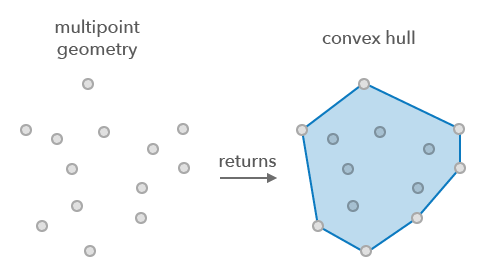

Brute forcing an answer will take $O(n^3)$ time as there are $O(n^2)$ possible vertices that will be drawn between every pair of points; and each vertix would take $O(n)$ to verify (see if every point it to one side of it). Divide and conquer can achieve a better performance by sorting $S$ by $x$ coordinates (one time $O(n\log n)$) and dividing it into $2$ segments (by $x$ coordinates), $A$ and $B$; calculating their $\text{CH}(\cdot)$ and combining them to return global $\text{CH}(S)$.

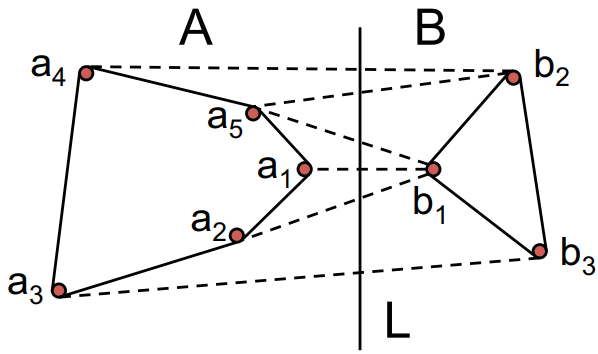

Where each point $a_i\in\text{CH}(A)$ is numbered maximising the $x$ coordiante, and $b_j\in\text{CH}(B)$ numbered to minimise the $x$ coordinates; $L$ is the vertical line separating $A$ and $B$, and $y(i,j)$ as the $y$ coordinate of the intersection between $L$ and the segment $(a_i,b_j)$.

It can be clearly seen that $2$ segments are required to merge the two convex hulls; an *upper-tangent* (no point is above it) and a *lower-tangent* (no point is under it).

Given $(a_i,b_j)$ is the *upper-tangent* then it is clear that only $a_i$ and $b_j$ are on the segment $(a_i,b_j)$, with all other vertices lie strictly below it. Taking any other pair $(a_l,a_k)$, if $l=i$ and $k\neq j$ then $y_i-\frac{y_j-y_i}{x_j-x_i}(x_k-x_i)>y_k$, meaning that the vertical projection of point $b_k$ to the *upper-tangent* will be higher than the point itself. As the segment $(a_l,b_k)$ is a straight line, at both endpoints that line is at or below segment $(a_i,b_j)$ and so $y(i,j)>y(l,k)$ regardless of where $L$ is relative to $x_i$ and $x_j$. By the same argument, $y(i,j)>y(l,k)$ for $l\neq i$ and $k=j$. If both $l\neq i$ and $k\neq j$, then both $a_l$ and $b_k$ are strictly below $(a_i,b_j)$ which means that there was no intersection with $(a_l,b_k)$ and so regardless where $L$ is relative to $x_i$ and $x_j$, $y(i,j)>y(l,k)$.

Therefore, $\forall a_i\in\text{CH}(A)$ and $b_j\in\text{CH}(B)$ if $(a_i,b_j)$ is the *upper-tangent* then $y(i,j)\geq y(l,k)$ (strict inequality when $(l,k)\neq(i,j)$).

Now suppose $(a_i,b_j)$ is such that $y(i,j)$ is maximal among all pairs $(a_l,b_k)$. Assume then that $(a_i,b_j)$ is not the *upper-tangent*, and so there must exist (without loss of generality) a point $b_q\in\text{CH}(B)$ that lies strictly above the segment $(a_i,b_j)$. Therefore, the segment $(a_i,b_q)$ is strictly above $(a_i,b_j)$ (except at $a_i$ where they meet), meaning that regardless of where $L$ is relative to $x_i^-$ and $x_j$, $y(i,q)>y(i,j)$. The same argument holds if $a_p\in\text{CH}(A)$ lies strictly above $(a_i,b_j)$, yielding $y(p,j)>y(i,j)$. Similarly to the above proof, for both $a_p\in\text{CH}(A)$ and $b_q\in\text{CH}(B)$ which are strictly above the segment $(a_i,b_j)$ means that $y(p,q)>y(i,j)$.

These are contradictions and so if $y(i,j)$ is maximal among all pairs, then $(a_i,b_j)$ is the *upper-tangent*. 

Therefore, $(a_i,b_j)$ is the *upper-tangent* **if and only if** it maximises $y(i,j)$. The arguments for the *lower-tangent* are exactly symmetric with inequalities reversed. From this, a divide and conquer algorithm can be designed as seen below

In [ ]:
# O(nlogn) time O(n) space
function find_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, isParentLeftHandside::Bool)
    # list are treated as doubly linked list ordered in anti-clockwise ordering from point 
    # closest to L for Left and clockwise for Right

    L_x = (left[begin][1]+right[begin][1])/2
    function y(a_i::Tuple{<:Number,<:Number}, b_j::Tuple{<:Number,<:Number}, L_x::Number)
        m = (b_j[2] - a_i[2]) / (b_j[1] - a_i[1])
        L_y = a_i[2] + m*(L_x - a_i[1])
        return L_y       
    end

    function next(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i,length(list))+1
    end

    function prev(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i-2,length(list))+1
    end

    function search_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, L_x::Number; comp, step)
        i = 1
        j = 1
        while true
            move_right = comp(y(left[i], right[step(right, j)], L_x), y(left[i], right[j], L_x))
            move_left = comp(y(left[step(left, i)], right[j], L_x),y(left[i], right[j], L_x))
            if !(move_left || move_right)
                break
            end

            if move_right
                j = step(right, j)
            else
                i = step(left, i)
            end
        end
        return i, j
    end

    ui, uj = search_tangent(left, right, L_x, comp = >, step = next)
    li, lj = search_tangent(left, right, L_x, comp = <, step = prev)
    result = Tuple{<:Number,<:Number}[]

    i = ui
    push!(result, left[i])
    while i != li
        i = next(left, i)
        push!(result, left[i])
    end

    j = lj
    push!(result, right[j])
    while j != uj
        j = prev(right, j)
        push!(result, right[j])
    end

    if isParentLeftHandside
        starting_point = findfirst(==(maximum(result)), result)
        return [result[starting_point:1:end]; result[begin:1:starting_point-1]]
    end
    starting_point = findfirst(==(minimum(result)), result)
    return [result[starting_point:-1:begin]; result[end:-1:starting_point+1]]
end

function convex_hull!(points::Vector{<:Tuple{<:Number,<:Number}}, start::Integer=1, stop::Integer=length(points), isLeftHandSide::Bool=true, level::Integer=0, verbose::Bool=false)
    if stop-start < 1
        return points[start:stop]
    end
    sort!(points)
    halfway = floor(Integer, (stop-start)/2)
    left = convex_hull!(points, start, start+halfway, true, level+1)
    right = convex_hull!(points, start+halfway+1, stop, false, level+1)
    convex = deepcopy(find_tangent(left, right, isLeftHandSide))
    verbose && println("   "^level, "$left $right == $convex")

    return convex
end

# Note that For this algorithm to work, no two have the same x or the same y coordinates (creates infinite gradient segments); 
# and no three points form a line (using the L height to optimise breaks).
data = [(-10,-3), (-8,15), (-6,1), (-4,20), (-2,-5), (0,18), (2,-1), (4,25), (6,-10), (8,12), (10,-2), (12,22)]
convex_hull!(data)

7-element Vector{Tuple{Number, Number}}:
 (12, 22)
 (4, 25)
 (-4, 20)
 (-8, 15)
 (-10, -3)
 (6, -10)
 (10, -2)

## Median Finding
Given set of $n$ numbers, define $rank(x)$ as the number of elements in the set that are $\leq x$; finding the element of rank $\lfloor\frac{n+1}{2}\rfloor$ (lower) and $\lceil\frac{n+1}{2}\rceil$ (upper) constitutes to finding the median. A naive approach would be to sort the set, taking $O(n\log n)$ time. 

By seperating the set into $k$ sets of size $\lceil\frac{n}{k}\rceil$ and extracting each's median takes $O(n)$ time; then finding the median of medians, $m_i$, would take $O(n)$ time. It is then garanteed that $>m_i$ for $\sim\lceil\frac{k}{2}\rceil\lceil\frac{n}{2k}\rceil$ (the same applies to guaranteed values $<m_i$).

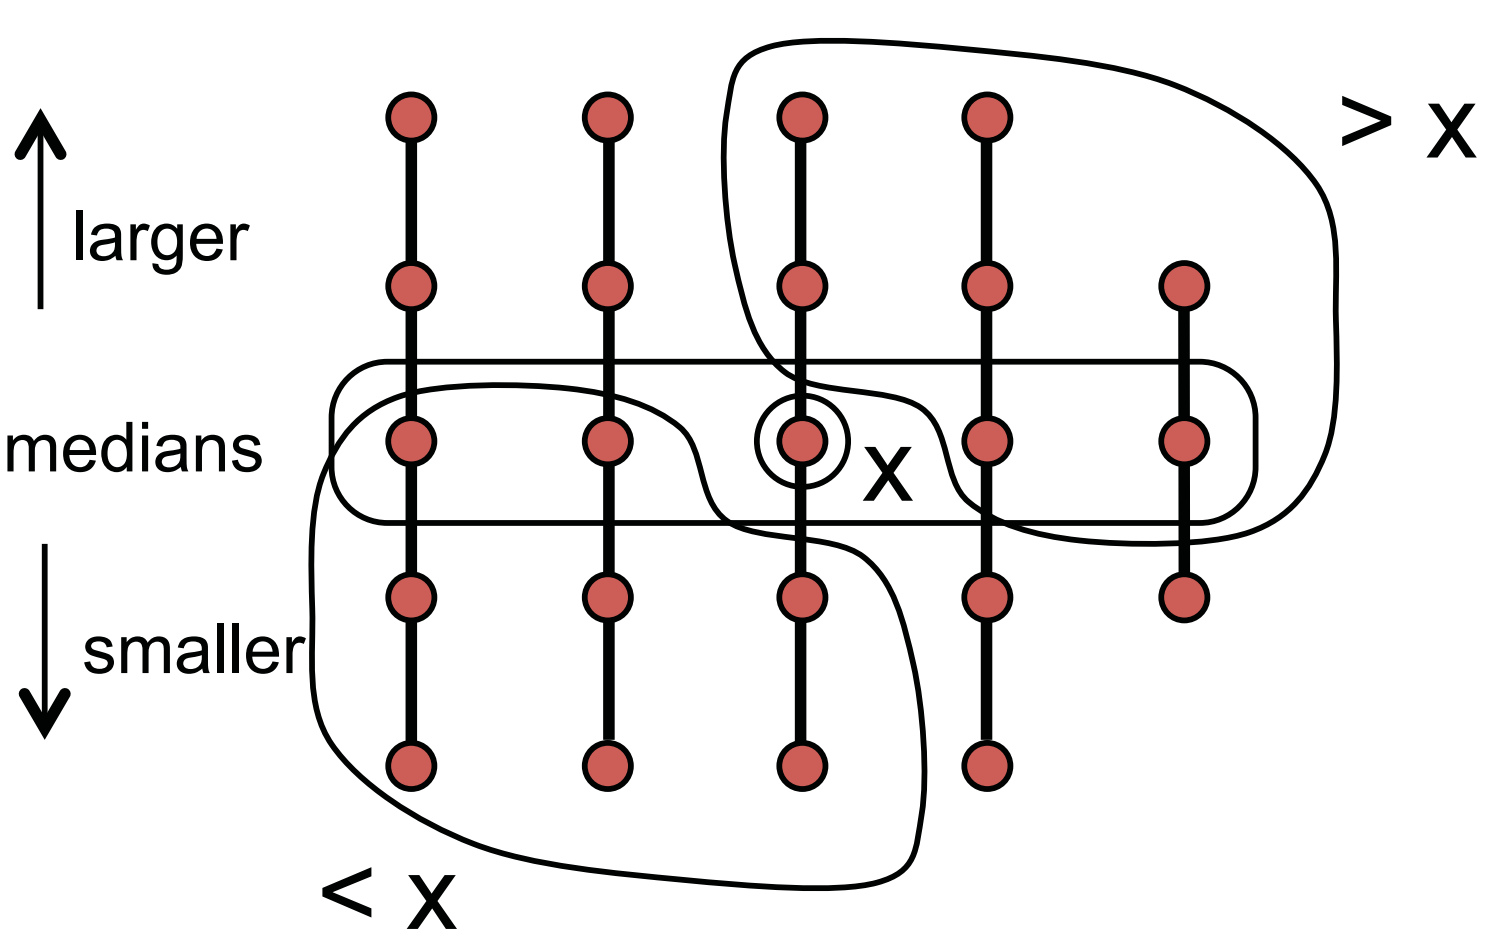

Therefore, it can be used in a divide and conquer algorithm which would run in $O(n)$ time; effectively dividing the set recursively (avoid $O(n^2)$ time complexity) and continuing with the segment which contains the median value, updating the targets in order to converge on it.

In [ ]:
# O(n) time O(n) space
function select_median_guess(lst::Vector{<:Number}, n::Number)
    k = cld(length(lst), n)
    medians = Number[]
    for i in 0:(n-1)
        if (i+1)*k>length(lst)
            subset = lst[i*k+1:end]
        else
            subset = lst[i*k+1:(i+1)*k]
        end
        sort!(subset)
        if !isempty(subset)
            push!(medians, subset[ceil(Integer, length(subset)/2)])
        end
    end
    sort!(medians)
    return medians[div(length(medians)+1,2)]
end

function median_finding(lst::Vector{<:Number}, i::Number)
    # modified algorithm to include scenarios where non-unique elements exist in lists
    if length(lst) <= 1
        return lst[begin]
    end
    x = select_median_guess(lst, 5)
    B = [y for y in lst if y<x]
    C = [y for y in lst if y>x]
    E = [y for y in lst if y==x]
    rank = length(B)+length(E)
    
    if i <= length(B)
        return median_finding(B, i)
    elseif i <= length(B) + length(E)
        return x
    else
        return median_finding(C, i-rank)
    end
end

for i in 1:100
    data = rand(-1000:1000, 100000)
    pred = median_finding(data, ceil(Integer, length(data)/2))
    sort!(data)
    test = data[ceil(Integer, length(data)/2)]
    @assert pred == test
    print(".")
end

....................................................................................................

## Fast Fourier Transform
Given a polynomial (in *coefficient* representation), $A(x)=a_0+a_1x+\ldots+a_nx^n=\sum_{k=0}^na_kx^k$, evaluating this equation at a given input, $x_0$, can be done in $O(n)$ time by memoizing $x^k$ to calculate $x^{k+1}$ (require single multiplication using Horner's Rule, $A(x)=a_0+x(a_1+x(a_2+\ldots+x(a_n)\ldots))$,instead of $k$ many); adding polynomials can be also done in linear time as $A(x)+B(x)=\sum_{k=0}^n(a_k+b_k)x^k=C(x)$. Multiplication of polynomials however would take $O(n^2)$ time as $A(x)B(x)=\sum_{i=0}^na_ix^i\sum_{j=0}^nb_jx^j=\sum_{k=0}^nx^k\sum_{j=0}^ka_jb_{k-j}$; $O(n^{\log 3})$ or even $O(n^{1+\epsilon})$ $\forall\epsilon>0$ is possible via Strassen-like divide-and-conquer tricks.

As a consequence of the fundemental theorem of algebra, the *sample* representation, $(x_0,y_0),\ldots,(x_n,y_n)$ with $\forall i$ $A(x_i)=y_i$ and each $x_i$ is unique, uniquely determine a degree $n$ polynomial. Addition and multiplications can be computed by adding and multiplying the $y_i$ terms, assuming that the $x_i$ are matching ($O(n)$ complexity); while interpolation is required for evaluation ($O(n^2)$ complexity).

<table><tr><td>

To convert a *coefficient* representation polynomial into its *sample* representation, generating $X$ samples using the $n$ order polynomial is required; this naively takes $O(n^2)$ time as evaluating the polynimal takes $O(n)$ per sample. If instead, a divide-and-conquer approach is taken, where the polynomial is divided into $A_{\text{even}}(x)=\sum_{k=0}^{\lceil\frac{n}{2}\rceil}a_{2k}x^k=\{a_0,a_2,a_4,\ldots\}$ and $A_{\text{odd}}(x)=\sum_{k=0}^{\lceil\frac{n}{2}\rceil}a_{2k+1}x^k=\{a_1,a_3,a_5,\ldots\}$; in order to evaluate the original, merging is then done via $A(x)=A_{\text{even}}(x^2)+xA_{\text{odd}}(x^2)$. Note however, that there are still $X$ samples to evaluate at each level of recursion, and thus the complexity is $T(n,|X|)=2T(\frac{n}{2},|X|)+O(n+|X|)\approx 2^{\log n}T(1,|X|)+\log{n}O(n+|X|)=O(n^2)$. 

To fix this, $|X^2|=\frac{|X|}{2}$; meaning that to evaluate $2$ related samples, only $1$ needs to be calculated. This is possible as $A(1)=A_{\text{even}}(1)+A_{\text{odd}}(1)$ and $A(-1)=A_{\text{even}}(1)-A_{\text{odd}}(1)$ only require evaluating $1$ in the second level of the recursion; however for this to work in the divide and conquer method, this property must exist for every level of the recursion. This behaviour can be achieved using the *collapsing* sets, $\{1\}\leftarrow \{1,-1\}\leftarrow\{1,-1,i,-i\}\leftarrow\{1,-1,\pm\frac{\sqrt{2}}{2}(1+i),\pm\frac{\sqrt{2}}{2}(1-i)\}\leftarrow\ldots\{e^{\frac{-2\pi ik}{n}}\}_{k=0}^{n-1}$, which are the $n^{\text{th}}$ roots of unity (lie on the imaginary unit circle); each root can be defined as $\omega_n^k=e^{\frac{-2\pi ik}{n}}$. This redefines the compelxity to be $T(n)=2T(\frac{n}{2})+O(n)=O(n\log n)$ 
</td><td>

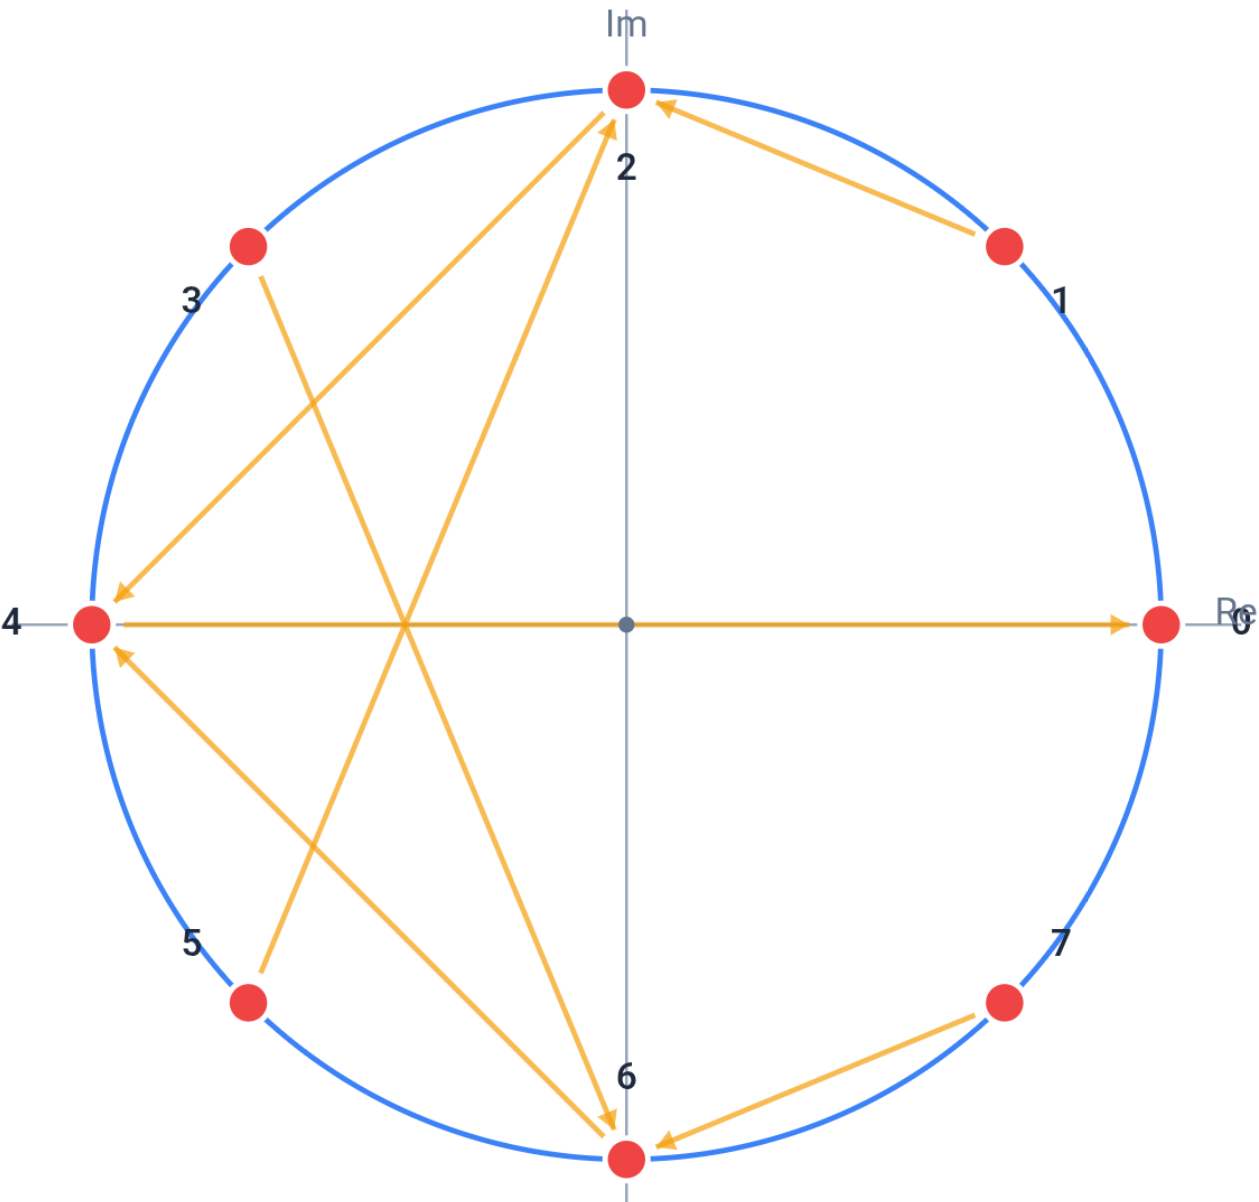

Given $k<\frac{n}{2}$

$$A(\omega_n^{k})=A_{\text{even}}(\omega_{n/2}^{k})+\omega_n^{k}A_{\text{odd}}(\omega_{n/2}^{k})$$

$$A(\omega_n^{\frac{n}{2}+k})=A_{\text{even}}(\omega_{n/2}^{k})+\omega_n^{\frac{n}{2}+k}A_{\text{odd}}(\omega_{n/2}^{k})$$

and as $\omega_n^{\frac{n}{2}+k}=\omega_n^{\frac{n}{2}}\omega_n^{k}$, if $n=2^l$ then $\omega_n^{\frac{n}{2}}=-1$ regardless of $n$; therefore, $A(\omega_n^{\frac{n}{2}+k})=A_{\text{even}}(\omega_{n/2}^{k})-\omega_n^{k}A_{\text{odd}}(\omega_{n/2}^{k})$
</td></tr></table>

In [ ]:
function fast_fourier_transform(coeff::Vector{<:Number})
    n = length(coeff)
    if n <= 1
        return Complex.(coeff)
    end
    
    ω_n = exp(-2im * π / n)
    roots = Vector{Complex}(undef, (n ÷ 2))
    roots[1] = 1 + 0im 
    for k in 2:(n ÷ 2)
        roots[k] = roots[k-1] * ω_n
    end
    even = fast_fourier_transform(coeff[1:2:end])
    odd = fast_fourier_transform(coeff[2:2:end])
    
    return [even .+ (roots .* odd); even .- (roots .* odd)]
end

### Inverse FFT
Through FFT, the equation $VA=Y$ can be solved efficiently, where; $A$ is the *coefficient* vector of the polynomial, $V$ is the Vandermonde matrix with entries $V_{jk}=x_j^k=\omega_{n}^{jk}$ where $\omega_{n}=e^{-2\pi i/n}$ (primitive $n^{\text{th}}$ root of unity), and $Y$ is the *sample* vector values.

Consider now $V\bar{V}=\sum_{m=0}^{n-1}\omega_n^{jm}\overline{\omega_n^{km}}=\sum_{m=0}^{n-1}\omega_n^{(j-k)m}$ (row $j$ of $V$ times column $k$ of $\bar{V}$) and so it can be clearly seen that if $j=k$ then $sum_{m=0}^{n-1}\omega_n^{(j-k)m}=n$. If $j\neq k$, then $sum_{m=0}^{n-1}\omega_n^{(j-k)m}=\sum_{m=0}^{n-1}\omega_n^{m}$ regardless of $j$ or $k$ as these only shift the starting position of the summation over all roots of unity (full rotation), which total to $0$ (imaginary roots come in both positive and negative, eliminating each other). Therefore, $V\bar{V}=nI$, meaning $V^{-1}=\bar{V}/n$; and so converting the *sample* representation of the polynomial to its *coefficient* representation can be computed directly via $\frac{1}{n}\bar{V}Y=A$. This however, requires $O(n^2)$ operations due to matrix multiplication.

A better approach uses the Discrete Fourier Transform (DFT) which converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The DFT transforms a sequence of $N$ complex numbers $\{x_n\}:=x_0,x_1,\ldots,x_{N-1}$ into a sequence of complex numbers $\{X_k\}:=X_0,X_1,\ldots,X_{N-1}$ defined by $X_k=\sum_{n=0}^{N-1}x_ne^{-2\pi i\frac{k}{N}n}$ with the inverse transform given by $x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_ke^{2\pi i\frac{k}{N}n}$.

The DFT matrix is exactly the Vandermonde matrix $V$, and so computing $VA=Y$ is equivalent to appying the DFT. The same is true to the inverse , $\frac{1}{n}\bar{V}Y=A$, being equivalent to the applying the inverse DFT. As can be seen by the above formulas, the inverse DFT can be computed by the conjugate of the DFT to the conjugate of teh input; and as the DFT can be solved using FFT, then $\text{IFFT}(x)=\frac{1}{n}\overline{\text{FFT}(\bar{x})}$, decreasing the complexity to $O(n\log n)$.

In [ ]:
function inverse_fast_fast_fourier_transform(coeff::Vector{<:Number})
    n = length(coeff)
    conj_fft = fast_fourier_transform(conj.(coeff))
    return conj.(conj_fft) ./ n
end

#### Fast Polynomial Multiplication
After defining both FFT and IFFT, a procedure can be created which takes $2$ polynomials of order $n$ and computes their product in $O(n\log n)$ time (instead of the direct method $O(n^2)$ time). This is achieved by first converting their representations to *sample* representations (using FFT), performing multiplication, and converting the result back to *coefficient* representation (using IFFT).

In [ ]:
function fast_polynomial_multiplication(coeffA::Vector{<:Number}, coeffB::Vector{<:Number})
    n = 1
    while n < length(coeffA) + length(coeffB)
        n *= 2
    end
    paddedA = Complex.(vcat(coeffA, zeros(n - length(coeffA))))
    paddedB = Complex.(vcat(coeffB, zeros(n - length(coeffB))))
    fftA = fast_fourier_transform(paddedA)
    fftB = fast_fourier_transform(paddedB)
    fftC = fftA .* fftB
    coeffC = inverse_fast_fast_fourier_transform(fftC)
    return [round(real(x), digits=5) for x in c]
end
fast_polynomial_multiplication([1, 2, 3],[4,5,6])

## ***van Emde Boas Tree*** (*vEB*)
Named after it's inventor, Dutch computer scientist *Peter van Emde Boas*, *vEB* is a data structure which maintains $n$ elements among $\{0,1,\ldots,u-1\}$. It is capable of $\text{INSERT}$, $\text{DELETE}$, and $\text{SUCCESSOR}$ (given an element efficiently query which element in the data structure succeeds it) all in $O(\log\log u)$ time (if $u=n^{O(1)}$ or $u=n^{\log^{O(1)}n}$ then $O(\log\log u)=O(\log\log n)$). This increadible speed makes *vEB* ideal for network routing.

To achieve this, the divide-and-conquer algorithm must be of the form $T(\log u)=T(\frac{\log u}{2})+O(1)=O(\log\log u)\rightarrow T(u)=T(\sqrt{u})+O(1)=O(\log\log u)$.

### ***Bit Vector***
If $\text{INSERT}$, $\text{DELETE}$ must run in constant time (without regard to $\text{SUCCESSOR}$); the *bit vector* data structure can be used, an array of size $u$ ($n<u$) where $0$ denotes absence and $1$ presence. This clearly would have insertion and deletion run in $O(1)$ as it would be simply switching on/off the desired bit position; $\text{SUCCESSOR}$ additionally takes $O(u)$ (successor of $0$ in an empty vector) time.

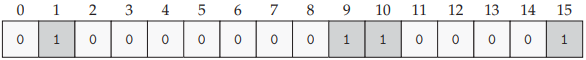

### Split Universe into Clusters
The performance of the $\text{SUCCESSOR}$ can be improved by segmenting the array into $\sqrt{u}$ clusters and independently store each segment's summary ($0$ if segment is empty, else $1$). This means that each segment is of size $\sqrt{u}$, and so is the segments' summary. Search could then utilise the segment summaries to skip empty segments, vastly reducing complexity to $O(\sqrt{u})$ (look in $x\text{'s}$ cluster, look in segments' summary, look in next non-empty cluster). Note that this addition results in $O(1)$ insertion but $O(\sqrt{u})$ deletion (look in $x\text{'s}$ cluster, update $1\rightarrow 0$ is no other bit is on).

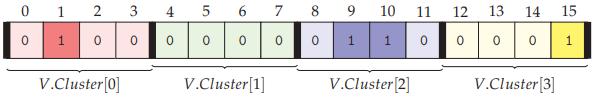

### Divide & Conquer
From the above, it can now be clearly seen that $T(u)=T(\sqrt{u})+O(1)=O(\log\log u)$ is achievable using a recusive approach to the *bit array* segmentation. 

Given `high(x)=floor(x/sqrt(u))=i`, `low(x)=mode(x,sqrt(u))=j`, and `index(i,j)=i*sqrt(u)+j=x`. These can be simply calculated by taking the $\sqrt{u}$ high ($\lfloor\frac{x}{\sqrt{u}}\rfloor$) and low ($x\mod\sqrt{u}$) bits of $x$ given it has $u$ bits. Define a *vEB* object, `V` of size $u$, where `V.cluster[i]` is an *vEB* object of size $\sqrt{u}$ ($0\leq i<\sqrt{u}$) and `V.summary` is an an *vEB* object of size $\sqrt{u}$. `INSERT(V,x)` is then done by calling `INSERT(V.cluster[high(x)],low(x))` (recursively inserting to the lowest level) and `INSERT(V.summary, high(x))` (recursively update summaries). This results in $T(u)=2T(\sqrt{u})+O(1)=O(\log u)$ (using the master method). `SUCCESSOR(V,x)` is then also done defining `i=high(x)` and calling `j=SUCCESSOR(V.cluster[i],low(x))`. If $j<0$ then redefine `i=SUCCESSOR(V.summary,high(x))` and call `SUCCESSOR(V.cluster[i],-1)` again; returnign the value `i*sqrt(u)+j`. This  results in $T(u)=3T(\sqrt{u})+O(1)=O(\log u)^{\log_2 3}$ complexity.

#### Improving Divide & Conquer
To remove the final recursion call in $\text{SUCCESSOR}$, instead of storing $0$/$1$ in the segment summary, storing the *minimum* value item (`V.min`) can be done in constant time (adding `V.min = x<V.min ? x : V.min` to pre-existing procedure). This then means that `SUCCESSOR(V.cluster[i],-1)` can be replaced by `V.cluster[i].min` (reducing complexity to $O(\log u)$).

Further, storing the *maximum* value item (`V.max`) can be done in constant time (adding `V.max = x<V.max ? x : V.max` to pre-existing procedure); and doing so creates a constant time method to identify which of the two recursions will lead to a successful results (`x>V.max ? SUCCESSOR(V.summary,high(x)) : SUCCESSOR(V.cluster[i],low(x))`). This therefore, reducing the complexity to teh desired $T(u)=T(\sqrt{u})+O(1)=O(\log\log u)$.

While ***Lazy Tree Propagation*** does work at decreasing the complexity of insertion to $O(\log\log u)$ (keep another variable to store initial element and each time an insert is invoked bring the element further down the structure) but is more complex to implement then the ideal solution. Instead, the first item is placed inside `V.min` non-recursively (*lazy*); and hence the insertion takes place with only $1$ recursive call. This is because `if V.min=isnan(V.min) then V.min=x and V.max=x`, `if x<V.min then INSERT(V.cluster[high(V.min)],low(V.min)) and V.min=x else INSERT(V.cluster[high(x)],low(x))`

In [ ]:
using System;
using System.Linq;
using System.Collections.Generic;

#nullable enable

public class Veb {
    public int Size { get; }
	public int Level { get; }
    private readonly int ClusterSize;

    public Dictionary<int, Veb> Clusters { get; private set; }
    public Veb? Summary { get; private set; }
    public int? Min { get; private set; }
    public int? Max { get; private set; }
	public int Count { get; private set; }

    public bool IsLeaf => Size <= 0;

    public Veb (int size, int level=0) {
        Size = size;
		Level = level;
        ClusterSize = (int)Math.Pow(2, Math.Pow(2, Size-1));
		Count = 0;
		
		Clusters = new Dictionary<int, Veb>();
		if (!IsLeaf) {
			Summary = new Veb(Size-1, level+1);
		}
    }

    public void Insert(int item) {
		Count += 1;
        if (IsLeaf) {
            if (Min is null && Max is null) {
                Min = Max = item;
            } else {
                if (item < Min) Min = item;
                if (item > Max) Max = item;
            }
            return;
        }
        if (Min is null) {
            Min = Max = item;
            return;
        }
        if (item < Min) (item, Min) = ((int)Min, item);
        if (item > Max) Max = item;

        int high = item / ClusterSize;
        int low = item % ClusterSize;
        // if enters this loop, guranteed O(1) from clusters loop
        if (!Clusters.TryGetValue(high, out var cluster) && Summary is not null) {
			Summary.Insert(high);
			cluster = new Veb(Size-1, Level+1);
			Clusters[high] = cluster;
		}
        Clusters[high].Insert(low);
    }

	public void Delete(int item) {
		if (Count <= 0 || Min is null || item < Min || Max is null || item > Max) return;
		
		if (IsLeaf || Count <= 1) {
        	if (item == Min && item == Max) Min = Max = null;
        	else if (item == Min) Min = Max;
        	else if (item == Max) Max = Min;
			Count = Math.Max(Count - 1, 0);
        	return;
    	}
		
		var high = item / ClusterSize;
        var low = item % ClusterSize;
		if (item == Min) {
			if (Summary is not null && Summary.Min is not null && 
			Clusters.TryGetValue((int)Summary.Min, out var cluster) && cluster.Min is not null) {
				high = (int)Summary.Min;
				low = (int)cluster.Min;
				Min = high*ClusterSize + low;
			} else {
				Max = Min = null;
				Count = Math.Max(Count - 1, 0);
				return;
			}
		}
		if (Clusters.TryGetValue(high, out var clusters)) { 
			clusters.Delete(low);
			Count = Math.Max(Count - 1, 0);
			// if runs, means that Clusters[high].Delete(low) took O(1) time
			if (clusters.Min is null && Summary is not null) {
				Summary.Delete(high);
				Clusters.Remove(high);
			}
		}
        
		if (item == Max) {
			if (Summary is not null && Summary.Max is not null && 
			Clusters.TryGetValue((int)Summary.Max, out var cluster) && cluster.Max is not null) {
				Max = (int)Summary.Max*ClusterSize + (int)cluster.Max;
			} else {
				Max = Min;
			}
		}
	}

    public int? Successor(int item) {
        if (IsLeaf) {
            if (Min is not null && item < Min) return Min;
            else if (Max is not null && item < Max) return Max;
            else return null;
        }
        if (Min is not null && item < Min) return Min;
        if (Max is not null && item >= Max) return null;

        int high = item / ClusterSize;
        int low = item % ClusterSize;
		if (Clusters.TryGetValue(high, out var cluster) && 
		cluster.Max is not null && low < cluster.Max) {
			var offset = cluster.Successor(low);
			return (offset is null) ? null : high * ClusterSize + offset;
		} 
		var next = Summary!.Successor(high);
		if (next is not null && Clusters.TryGetValue(next.Value, out cluster) 
		&& cluster.Min is not null) {
			return next.Value * ClusterSize + cluster.Min;
		}
		return null;
    }

    public int? Predecessor(int item) {
        if (IsLeaf) {
            if (Max is not null && item > Max) return Max;
            else if (Min is not null && item > Min) return Min;
            else return null;
        }
        if (Max is not null && item > Max) return Max;
        if (Min is not null && item <= Min) return null;

        int high = item / ClusterSize;
        int low = item % ClusterSize;
		if (Clusters.TryGetValue(high, out var cluster) 
		&& cluster.Min is not null && low > cluster.Min) {
			var offset = cluster.Predecessor(low);
			return high * ClusterSize + (offset ?? Clusters[high].Min);
		}
		var next = Summary!.Predecessor(high);
		if (next is not null && Clusters.TryGetValue(next.Value, out cluster) 
		&& cluster.Max is not null) {
			return next.Value * ClusterSize + cluster.Max;
		}
		return Min;
    }

    public void Print() {
		string padding = new String('\t', Level);
		Console.WriteLine($"{padding}Min {Min}, Max {Max}, Count {Count}");
		if (!IsLeaf && Summary is not null) {
			Console.WriteLine($"{padding}Summary");
			Summary.Print();
			foreach (int key in Clusters.Keys) {
				Console.WriteLine($"{padding}Cluster{key}");
				Clusters[key].Print();
			}
		}
	}

    public bool Member(int item) {
		var suc = Successor(item-1);
		var pre = Predecessor(item+1);
		return (suc is not null) && (pre is not null) && (suc == pre);
	}
	
	public int? Minimum() {
		return Min;
	}
	
	public int? Maximum() {
		return Max;
	}

	public List<int> ToList() {
		List<int> values = new List<int>();
		var tmp = Min;
		while (tmp is not null) {
			values.Add((int)tmp);
			tmp = Successor((int)tmp);
		}
		return values;
	}
}

In [ ]:
public class Program
{
	public static List<int> VebSort(List<int> numbers) {
		int size = Math.Max((int)Math.Ceiling(Math.Log2(Math.Log2(numbers.Max()-numbers.Min()+1))), 1);
		var freq = new Dictionary<int, int>(capacity: numbers.Count);
		Veb sorter = new Veb(size);
		foreach (int number in numbers) {
			int norm = number-numbers.Min();
			freq[norm] = req.TryGetValue(norm, out int c) ? c + 1 : 1;
			if (freq[norm] <= 1) sorter.Insert(norm);
		}
		List<int> sortedSet = sorter.ToList();
		List<int> sortedList = new List<int>(capacity: numbers.Count);
		foreach (int number in sortedSet) {
			for (int i = 0; i < freq[number]; i++) {
				sortedList.Add(number+numbers.Min());
			}
		}
		return sortedList;
	}
	
	public static void Main()
	{
		Veb test = new Veb(2);
		test.Insert(3);
		test.Insert(6);
		test.Insert(2);
		test.Insert(0);
		test.Insert(-1);		
		Console.WriteLine(test.Successor(1)); // 2
		Console.WriteLine(test.Predecessor(7)); // 6
		test.Delete(6);
		Console.WriteLine(test.Member(6)); // False
		Console.WriteLine(test.Predecessor(7)); // 3
		Console.WriteLine(string.Join(", ", test.ToList())); //-1, 0, 2, 3
		Console.WriteLine(string.Join(", ", Program.VebSort(new List<int> {12, -3, 7, 0, 5})));
	}
}

Space complexity is however  $O(u)$ which is quite large; however, by changing the data structure to only create nonempty clusters (using *dictionaries* instead of pre-initialised arrays) and dealocating the space once the cluster becomes empty (`Min==null`). As each insertion creates a new structure $O(\log\log u)$, the total space used is $O(n\log\log u)$.